In [1]:
import pandas as pd

df = pd.read_csv('/Users/ashleystevens/Desktop/Impact_of_Remote_Work_on_Mental_Health.csv')

df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [2]:
# Checking for missing values in the dataset.

missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) 

Mental_Health_Condition    1196
Physical_Activity          1629
dtype: int64


In [3]:
# Filling in the missing values. Changed mental health condition and physical activity to None and N/A. Then checked to make sure there were no missing values by lookings at the information of the dataframe. 

df["Mental_Health_Condition"].fillna('None', inplace=True)
df["Physical_Activity"].fillna('N/A', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            5000 non-null   object
 12  Access

/var/folders/gq/n04dllr12q13h1k6rl_7c_sm0000gn/T/ipykernel_14215/473994518.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Mental_Health_Condition"].fillna('None', inplace=True)
/var/folders/gq/n04dllr12q13h1k6rl_7c_sm0000gn/T/ipykernel_14215/473994518.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

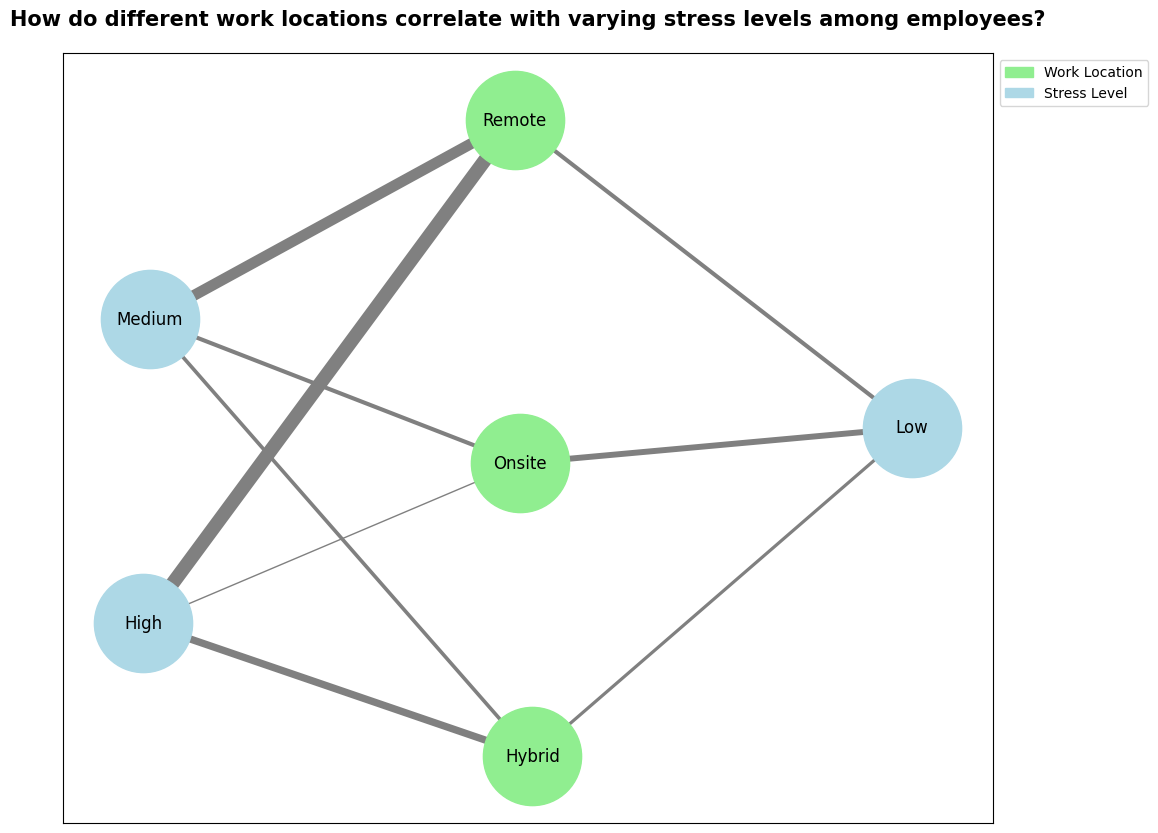

In [4]:
#This code provides a network graph to show the relationship between work location and stress levels. 

import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from matplotlib.patches import Patch

location_condition_counts = df.groupby(['Work_Location', 'Stress_Level']).size().reset_index(name='count')

G = nx.Graph()

locations = df['Work_Location'].unique()
conditions = df['Stress_Level'].unique()
G.add_nodes_from(locations, bipartite=0) 
G.add_nodes_from(conditions, bipartite=1) 


for _, row in location_condition_counts.iterrows():
    G.add_edge(row['Work_Location'], row['Stress_Level'], weight=row['count'])


pos = nx.kamada_kawai_layout(G)


weights = np.array([attr['weight'] for _, _, attr in G.edges(data=True)]).reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(1, 10))  
normalized_weights = scaler.fit_transform(weights).flatten()

plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, nodelist=locations, node_color='lightgreen', node_size=5000, label="Work Location") 
nx.draw_networkx_nodes(G, pos, nodelist=conditions, node_color='lightblue', node_size=5000, label="Stress Level")  

nx.draw_networkx_edges(
    G, pos, edgelist=G.edges(data=True), 
    width=normalized_weights,  
    edge_color="grey"
)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

legend_elements = [
    Patch(facecolor='lightgreen', edgecolor='lightgreen', label='Work Location'),
    Patch(facecolor='lightblue', edgecolor='lightblue', label='Stress Level')
]

plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
plt.title("How do different work locations correlate with varying stress levels among employees?", fontsize=15, fontweight='bold', pad=20)
plt.show()


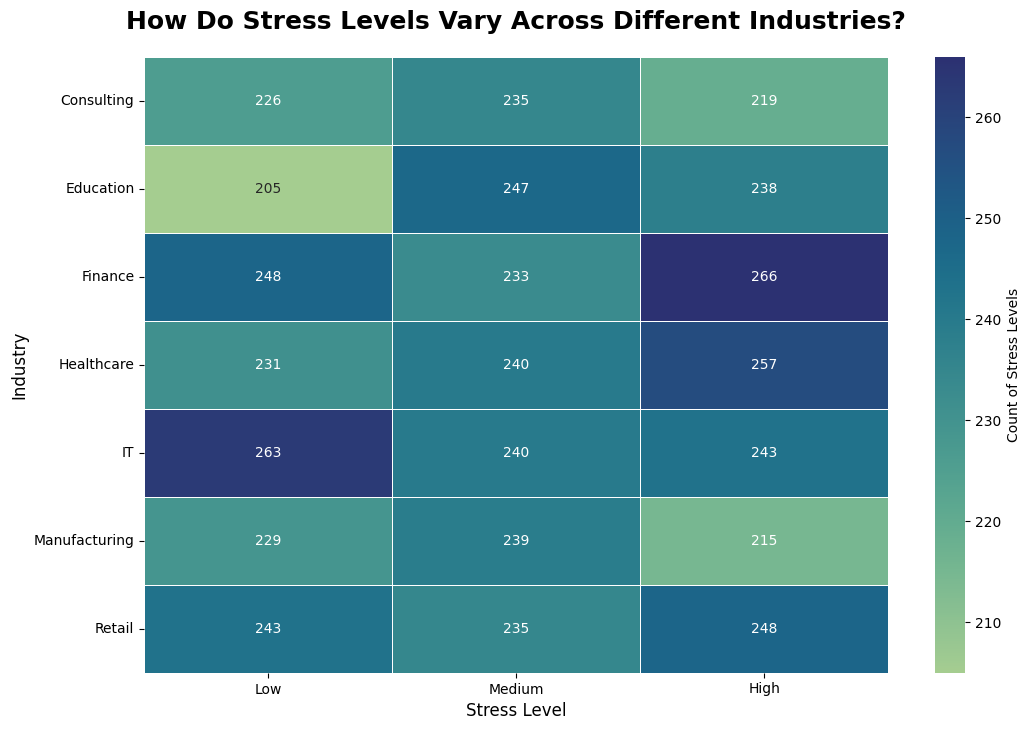

In [5]:
#This code creates a heatmap to visualize the distribution of stress levels (Low, Medium, High) across different industries, showing the count of each stress level within each industry.

import seaborn as sns

stress_counts = df.groupby(['Industry', 'Stress_Level']).size().unstack(fill_value=0)

stress_counts = stress_counts[['Low', 'Medium', 'High']]

plt.figure(figsize=(12, 8))
sns.heatmap(
    stress_counts, 
    annot=True, 
    cmap=sns.color_palette("crest", as_cmap=True),
    cbar_kws={'label': 'Count of Stress Levels'}, 
    fmt=".0f",  
    linewidths=0.5,  
    linecolor='white'
)

plt.title("How Do Stress Levels Vary Across Different Industries?", fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Stress Level', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()



/var/folders/gq/n04dllr12q13h1k6rl_7c_sm0000gn/T/ipykernel_14215/1134555528.py:15: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  ax = sns.barplot(data=stress_mental_health_melted,


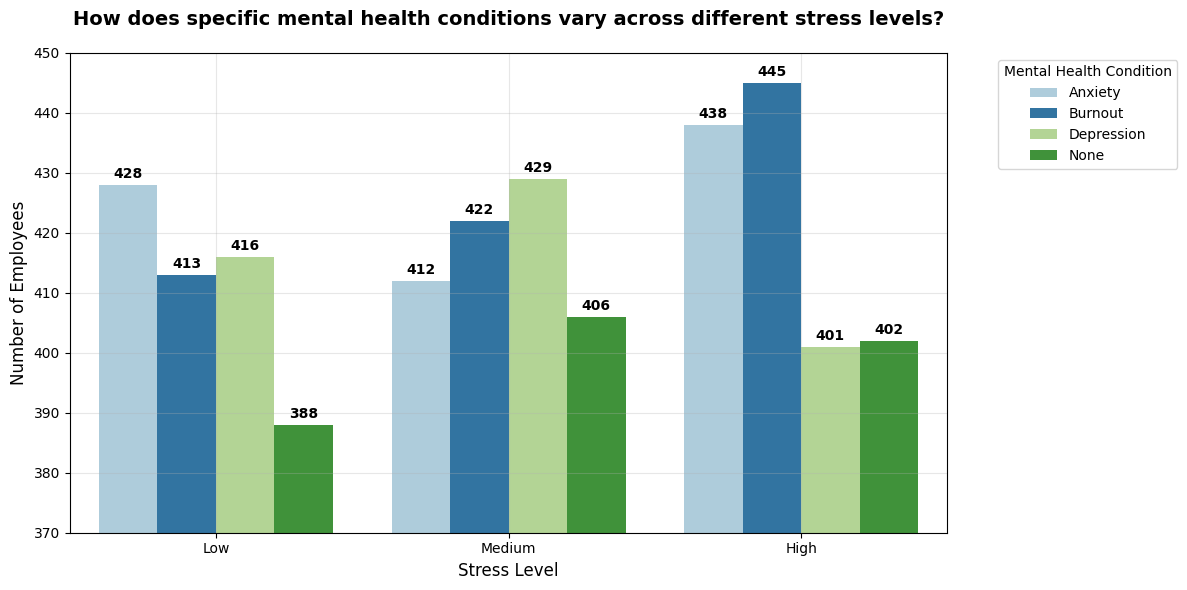

In [6]:
#This code creates a heatmap to visualize the distribution of stress levels (Low, Medium, High) across different industries, showing the count of each stress level within each industry.

df['Stress_Level'] = pd.Categorical(df['Stress_Level'], categories=['Low', 'Medium', 'High'], ordered=True)

stress_mental_health = pd.crosstab(df['Stress_Level'], df['Mental_Health_Condition'])

stress_mental_health_melted = stress_mental_health.reset_index().melt(
    id_vars=['Stress_Level'],
    var_name='Mental_Health_Condition',
    value_name='Count'
)

plt.figure(figsize=(12, 6))

ax = sns.barplot(data=stress_mental_health_melted, 
                 x='Stress_Level', 
                 y='Count',
                 hue='Mental_Health_Condition',
                 palette=sns.color_palette("Paired"))

plt.title('How does specific mental health conditions vary across different stress levels?', 
          pad=20, size=14, fontweight='bold')
plt.xlabel('Stress Level', size=12)
plt.ylabel('Number of Employees', size=12)

plt.ylim(370, 450)

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight='bold')

plt.grid(True, alpha=0.3)
plt.legend(title='Mental Health Condition', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left',
           title_fontsize=10,
           fontsize=10)

plt.tight_layout()

plt.show()
